## In this project we would like to build a supervised machine learning model to predict the number of calories in a product. We are getting the data from the government's database
[database]('https://data.gov.il/dataset/nutrition-database')

In [1]:
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/Pesticide Repository.csv', sep=',', encoding = "ISO-8859-8")
df

,מספר רשיון,סוג תכשיר,שם תכשיר,שם תכשיר אנגלי,סוג פעילות,סוג פעילות אנגלי,מספר או'ם,חומר פעיל,CAS.NO,קבוצת עמידות,...,נפח ליישום,כניסה מחדש,תקופת המתנה,שלב גידול,גיל גידול,שלב עשב,גיל עשב,אופי הפעלה,הערה גידול,סוג קרקע
0,9037,אינם קוטלי עשבים,אתרל אגרודיל,ETHREL,תכשירים בעלי היתר ליבוא מקביל,PARALLEL PERMIT IMPORT,NaN,ETHEPHON,16672-87-0,NaN,...,200 - 150 ליטר/דונם,לאחר התייבשות,0,NaN,NaN,NaN,NaN,NaN,"הטיפול בהתחלת שינוי גוון,בזני מטלי,רד רוזה וסנ...",NaN
1,9037,אינם קוטלי עשבים,אתרל אגרודיל,ETHREL,תכשירים בעלי היתר ליבוא מקביל,PARALLEL PERMIT IMPORT,NaN,ETHEPHON,16672-87-0,NaN,...,200 - 150 ליטר/דונם,לאחר התייבשות,10,NaN,NaN,NaN,NaN,NaN,"הטיפול בזן אורליאנס, יונתן ומיני דלישס.",NaN
2,9078,אינם קוטלי עשבים,דיקרזול אגרודיל,DICARZOL,תכשירים בעלי היתר ליבוא מקביל,PARALLEL PERMIT IMPORT,2757.0,FORMETANATE HYDROCHLORIDE,23422-53-9,NaN,...,75 - 30 ליטר/דונם,3 ימים מהריסוס,NaN,NaN,NaN,NaN,NaN,NaN,אין לטפל עם רמת הנגיעות עולה על 3 תריפסים לפרח,NaN
3,9078,אינם קוטלי עשבים,דיקרזול אגרודיל,DICARZOL,תכשירים בעלי היתר ליבוא מקביל,PARALLEL PERMIT IMPORT,2757.0,FORMETANATE HYDROCHLORIDE,23422-53-9,NaN,...,50 - 30 ליטר/דונם,3 ימים מהריסוס,NaN,NaN,NaN,NaN,NaN,NaN,הריסוס בשלב הפריחה,NaN
4,9078,אינם קוטלי עשבים,דיקרזול אגרודיל,DICARZOL,תכשירים בעלי היתר ליבוא מקביל,PARALLEL PERMIT IMPORT,2757.0,FORMETANATE HYDROCHLORIDE,23422-53-9,NaN,...,50 - 30 ליטר/דונם,3 ימים מהריסוס,4,NaN,NaN,NaN,NaN,NaN,"הוספת סוכר 1.5 ק""ג/ד עשויה לשפר את הקטילה",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44103,7278,אורגני,גניקן,GANIKAN,קוטלי פטריות וחיידקים,FUNGICIDES & BACTERICIDES,NaN,CANOLA OIL,120962-03-0,NaN,...,60 - 40 ליטר/דונם,.תכשיר לחקלאות אורגנית לאחר התייבשות התרסיס,3,NaN,NaN,NaN,NaN,NaN,בתוספת משטח אגוז 0.1%,NaN
44104,7326,אורגני,אי.או.אס,EOS,קוטלי חרקים ואקריות,INSECTICIDES & ACARICIDES,NaN,"DISTILLATES (PETROLEUM), HYDROTREATED LIGHT PA...",64742-55-8,ללא,...,עד נגירה,.תכשיר לחקלאות אורגנית לאחר היתייבשות,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44105,7059,אורגני,בלו שילד,BLUE SHIELD,קוטלי פטריות וחיידקים,FUNGICIDES & BACTERICIDES,3077.0,COPPER HYDROXIDE,20427-59-2,NaN,...,50 - 30 ליטר/דונם,.תכשיר לחקלאות אורגנית 48שעות,7,NaN,NaN,NaN,NaN,NaN,"המינון הנמוך בטיפול מניעה, יש להגדיל את הריכוז...",NaN
44106,7278,אורגני,גניקן,GANIKAN,קוטלי חרקים ואקריות,INSECTICIDES & ACARICIDES,NaN,CANOLA OIL,120962-03-0,NaN,...,60 - 40 ליטר/דונם,.תכשיר לחקלאות אורגנית לאחר התייבשות התרסיס,3,NaN,NaN,NaN,NaN,NaN,מנטה ספרדית. בתוספת משטח אגוז 0.1%,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44108 entries, 0 to 44107
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   מספר רשיון             44108 non-null  int64  
 1   סוג תכשיר              44108 non-null  object 
 2   שם תכשיר               44108 non-null  object 
 3   שם תכשיר אנגלי         44108 non-null  object 
 4   סוג פעילות             44108 non-null  object 
 5   סוג פעילות אנגלי       44108 non-null  object 
 6   מספר או'ם              32924 non-null  float64
 7   חומר פעיל              44108 non-null  object 
 8   CAS.NO                 44108 non-null  object 
 9   קבוצת עמידות           35700 non-null  object 
 10  טרגט קוד               34878 non-null  object 
 11  ריכוז חומר פעיל        44105 non-null  object 
 12  ריכוש חומר פעיל אנגלי  44105 non-null  object 
 13  פורמולציה              44108 non-null  object 
 14  פורמולציה אנגלי        44108 non-null  object 
 15  בע

# Transform The Columns to numeric

In [4]:
def str_array_to_dictionry(my_list):
    my_dict = dict() 
    for index,value in enumerate(my_list):
        my_dict[value] = index
    return my_dict

In [5]:
def add_new_column(old_name, new_name):
    value = str_array_to_dictionry(pd.unique(df[old_name]))
    print(value)
    new_column = []
    for val in df[old_name]:
        new_column.append(value[val])
    df[new_name] = new_column

In [6]:
add_new_column("סוג תכשיר", 'preparation type num')

add_new_column("סוג פעילות אנגלי", 'activity type num')

add_new_column("סוג קרקע", 'field type num')

add_new_column("חומר פעיל", 'active ingredient num')

add_new_column('פורמולציה אנגלי', 'formulation num')

add_new_column('רעילות אנגלי', 'toxicity num')

add_new_column('דרגת רעילות אנגלי','degree of toxicity num')

add_new_column('קבוצת גידולים אנגלי', 'crop group num')

add_new_column('קבוצת נגעים אנגלי', 'lesion group num')

{'אינם קוטלי עשבים': 0, 'קוטלי עשבים': 1, 'אורגני': 2}
{'PARALLEL PERMIT IMPORT': 0, 'HERBICIDES & DEFOLIANTS': 1, 'MICRONUTRIENTS': 2, 'NEMATICIDES': 3, 'PLANT GROWTH REGULATORS': 4, 'SOIL DISINFECTANT': 5, 'FUNGICIDES & BACTERICIDES': 6, 'INSECTICIDES &   ACARICIDES': 7, 'REPELLENTS FOR BIRDS & MAMMALS': 8, 'ADJUVANTS': 9, 'INSECT ATTRACTANTS': 10, 'PLANT PROTECTION PRODUCTS FOR HOME GARDENS': 11, 'NATIONAL ORGANIC PROGRAM (NOP)': 12, 'WOUND SEALING MATERIALS': 13, 'POSTHARVEST TREATMENTS': 14, 'SEED TREATMENT': 15, 'MOLLUSCICIDES': 16, 'FUMIGANTS': 17, 'RODENTICIDES': 18, 'READY TO USE': 19, 'FERTILIZERS&SOIL CONDITIONNERS': 20}
{nan: 0, 'קלה': 1, 'כבדה': 2, 'בכל הקרקעות': 3, 'בינונית כבדה': 4, 'קלה בינונית כבדה': 5, 'בינונית': 6, 'קלה לס': 7, 'לס': 8, 'קלה בינונית': 9, 'חול לס': 10, 'לס חול לס': 11, 'בינונית לס': 12, 'בינונית לס חול לס': 13, 'בינונית כבדה לס': 14, 'בינונית חול לס': 15, 'כבדה לס': 16, 'קלה בינונית כבדה בכל הקרקעות': 17, 'בינונית כבדה חול לס': 18}
{'ETHEPHON': 0, 'FO

In [7]:
new_column = []
for index,value in enumerate(df['ריכוש חומר פעיל אנגלי']):
    try:
        if value.split(" ")[1] == "%":
            if value.split(" ")[0]:
                value = float(value.split(" ")[0]) * 10
            else:
                value = 1
        else:
            value = float(value.split(" ")[0])
    except:
        value=0
    new_column.append(value)
df['active substance concentration num'] = new_column

In [8]:
df['license number'] = df['מספר רשיון']
df['Preparation name'] = df['שם תכשיר אנגלי']

In [9]:
clean_data = df[['license number', 'Preparation name', 'preparation type num', 'activity type num', 'field type num', 'active ingredient num', 'formulation num', 'toxicity num', 'degree of toxicity num', 'crop group num', 'lesion group num', 'active substance concentration num']]

In [10]:
clean_data = clean_data.drop(clean_data[(clean_data['active substance concentration num']=='')].index)

In [11]:
clean_data = clean_data.drop_duplicates(subset='license number')
clean_data

,license number,Preparation name,preparation type num,activity type num,field type num,active ingredient num,formulation num,toxicity num,degree of toxicity num,crop group num,lesion group num,active substance concentration num
0,9037,ETHREL,0,0,0,0,0,0,0,0,0,480.0
2,9078,DICARZOL,0,0,0,1,1,1,1,1,1,500.0
8,9016,MAGISTER AGRODIL,0,0,0,2,2,0,1,2,1,200.0
9,9094,MOVENTO 100 - INTAGRO,0,0,0,3,2,0,0,3,1,100.0
11,9098,DICARZOL-Intagro,0,0,0,1,1,3,1,1,1,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43124,1879,T.O.G PASTE,0,4,0,74,30,5,0,1,0,27.0
43321,4470,SPLAT CYDIA,0,10,0,421,30,5,0,0,1,100.0
43808,7486,POLYSULPHATE GRANULAR,2,20,0,420,20,4,0,2,0,890.0
44032,4214,CHELAL Zn,0,2,0,485,0,4,0,7,0,70.0


In [12]:
# Description
print(clean_data.describe())

       license number  preparation type num  activity type num  \
count     1207.000000           1207.000000        1207.000000   
mean      3322.753935              0.433306           6.730737   
std       2314.418595              0.719534           4.559128   
min          2.000000              0.000000           0.000000   
25%       1529.000000              0.000000           4.000000   
50%       1992.000000              0.000000           6.000000   
75%       4401.500000              1.000000           7.000000   
max      11028.000000              2.000000          20.000000   

       field type num  active ingredient num  formulation num  toxicity num  \
count     1207.000000            1207.000000      1207.000000   1207.000000   
mean         0.086993             178.061309         6.773819      3.545982   
std          0.660334             122.330485         7.590649      2.991585   
min          0.000000               0.000000         0.000000      0.000000   
25%       

preparation type num distribution



In [13]:
print(clean_data.groupby('preparation type num').size())

preparation type num
0    848
1    195
2    164
dtype: int64


In [14]:
clean_data.info

<bound method DataFrame.info of        license number       Preparation name  preparation type num  \
0                9037                 ETHREL                     0   
2                9078               DICARZOL                     0   
8                9016       MAGISTER AGRODIL                     0   
9                9094  MOVENTO 100 - INTAGRO                     0   
11               9098       DICARZOL-Intagro                     0   
...               ...                    ...                   ...   
43124            1879            T.O.G PASTE                     0   
43321            4470            SPLAT CYDIA                     0   
43808            7486  POLYSULPHATE GRANULAR                     2   
44032            4214              CHELAL Zn                     0   
44073            7293                SULPHUR                     2   

       activity type num  field type num  active ingredient num  \
0                      0               0                    

# Splitting The Data

I will split my data into two parametrs:
* **X** - The data that I give to the model
* **y** - The data that I want to predict

In [15]:
X = clean_data.drop(['license number', 'preparation type num', 'Preparation name'],axis=1)
y = clean_data['preparation type num']

After choosing the columns that I want from the choosen data, I will split the data into test and traind variables:/\

In [16]:
X.columns

Index(['activity type num', 'field type num', 'active ingredient num',
       'formulation num', 'toxicity num', 'degree of toxicity num',
       'crop group num', 'lesion group num',
       'active substance concentration num'],
      dtype='object')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [18]:
print('y_test:   ', y_test.shape)
print('X_set:   ', X_test.shape)

y_test:    (242,)
X_set:    (242, 9)


# Analyze the Data by Comparing the Different columns


c:\Users\moria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


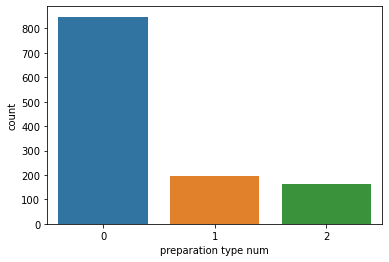

In [19]:
sns.countplot(clean_data['preparation type num'],label="Count")
plt.show()

# Creating Dummy Model

In [20]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_train, y_train)

0.705699481865285

# Finding Model

I will try to find the best model to analize my data:

* I will try to use the KNN model, and find the best number of nearest neighbors:

The best accuracy of the knn model is when k = 4 , and the score is: 0.8264462809917356


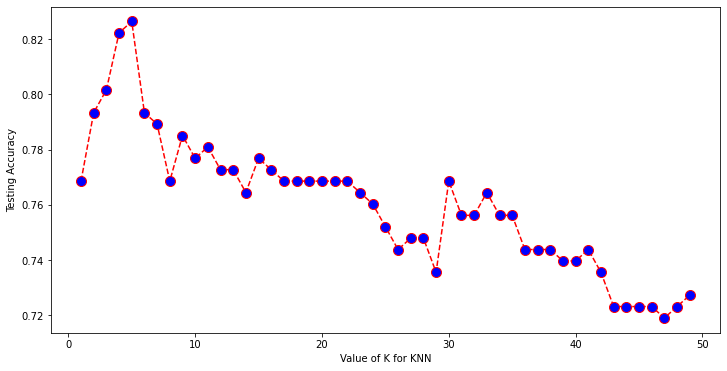

In [21]:
from sklearn import metrics

k_range = range(1,50)
scores = []
for k in k_range:
    knn_ = KNeighborsClassifier(n_neighbors=k)
    knn_.fit(X_train, y_train)
    y_pred = knn_.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(12, 6))
plt.plot(k_range, scores,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Finding the maximum k - the number of nearest neighbors:
max_score = max(scores)
best_k = scores.index(max_score)
print("The best accuracy of the knn model is when k =",best_k, ", and the score is:",max_score) 

* I will try to use the SVM.SVC model with kernel='sigmoid':

In [22]:
sm = SVC(kernel='sigmoid')
sm.fit(X_train, y_train)
y_pred = sm.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   ", accuracy)

accuracy:    0.6900826446280992


According to the models that I checked, the best accuracy scores is when I chosing knn model k = 5.

In [23]:
print("The accuracy score is:",max_score, ", or in another word:",(max_score*100),"%") 

The accuracy score is: 0.8264462809917356 , or in another word: 82.64462809917356 %


## Error Model

In [24]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,sm.predict(X_test))

0.7066115702479339

## Conclusion

* The accuracy score of the chosen model is 74.25%.

* I have seen that there is a connection between the components of the pesticide material, such as the amount of toxic substance, type of activity, type of soil, etc. and the type of preparation - non-herbicides, herbicides, organic.

# Part 2 (2nd semester)

In [25]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207 entries, 0 to 44073
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   license number                      1207 non-null   int64  
 1   Preparation name                    1207 non-null   object 
 2   preparation type num                1207 non-null   int64  
 3   activity type num                   1207 non-null   int64  
 4   field type num                      1207 non-null   int64  
 5   active ingredient num               1207 non-null   int64  
 6   formulation num                     1207 non-null   int64  
 7   toxicity num                        1207 non-null   int64  
 8   degree of toxicity num              1207 non-null   int64  
 9   crop group num                      1207 non-null   int64  
 10  lesion group num                    1207 non-null   int64  
 11  active substance concentration num  1207 n

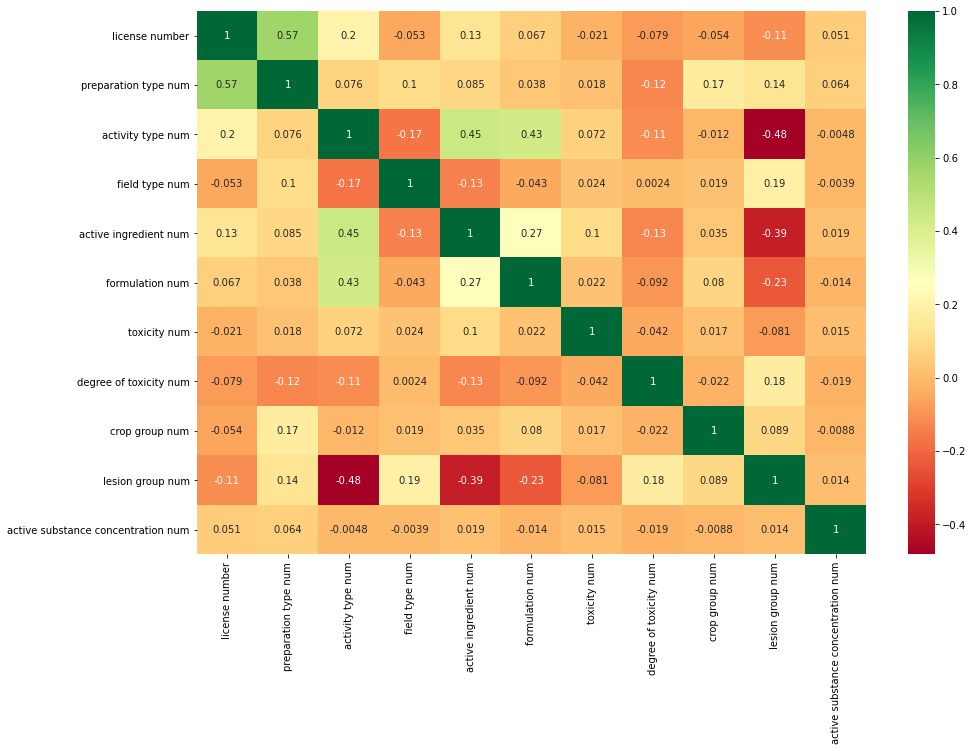

In [26]:
correlations = clean_data.corr()
plt.figure (figsize= (15,10))

heatmap_pesticide = sns.heatmap(clean_data.corr(), annot=True, cmap='RdYlGn')

plt.show()

array([[<AxesSubplot:xlabel='active ingredient num', ylabel='active ingredient num'>,
        <AxesSubplot:xlabel='degree of toxicity num', ylabel='active ingredient num'>,
        <AxesSubplot:xlabel='formulation num', ylabel='active ingredient num'>,
        <AxesSubplot:xlabel='toxicity num', ylabel='active ingredient num'>,
        <AxesSubplot:xlabel='lesion group num', ylabel='active ingredient num'>,
        <AxesSubplot:xlabel='active substance concentration num', ylabel='active ingredient num'>,
        <AxesSubplot:xlabel='field type num', ylabel='active ingredient num'>,
        <AxesSubplot:xlabel='preparation type num', ylabel='active ingredient num'>],
       [<AxesSubplot:xlabel='active ingredient num', ylabel='degree of toxicity num'>,
        <AxesSubplot:xlabel='degree of toxicity num', ylabel='degree of toxicity num'>,
        <AxesSubplot:xlabel='formulation num', ylabel='degree of toxicity num'>,
        <AxesSubplot:xlabel='toxicity num', ylabel='degree of toxicit

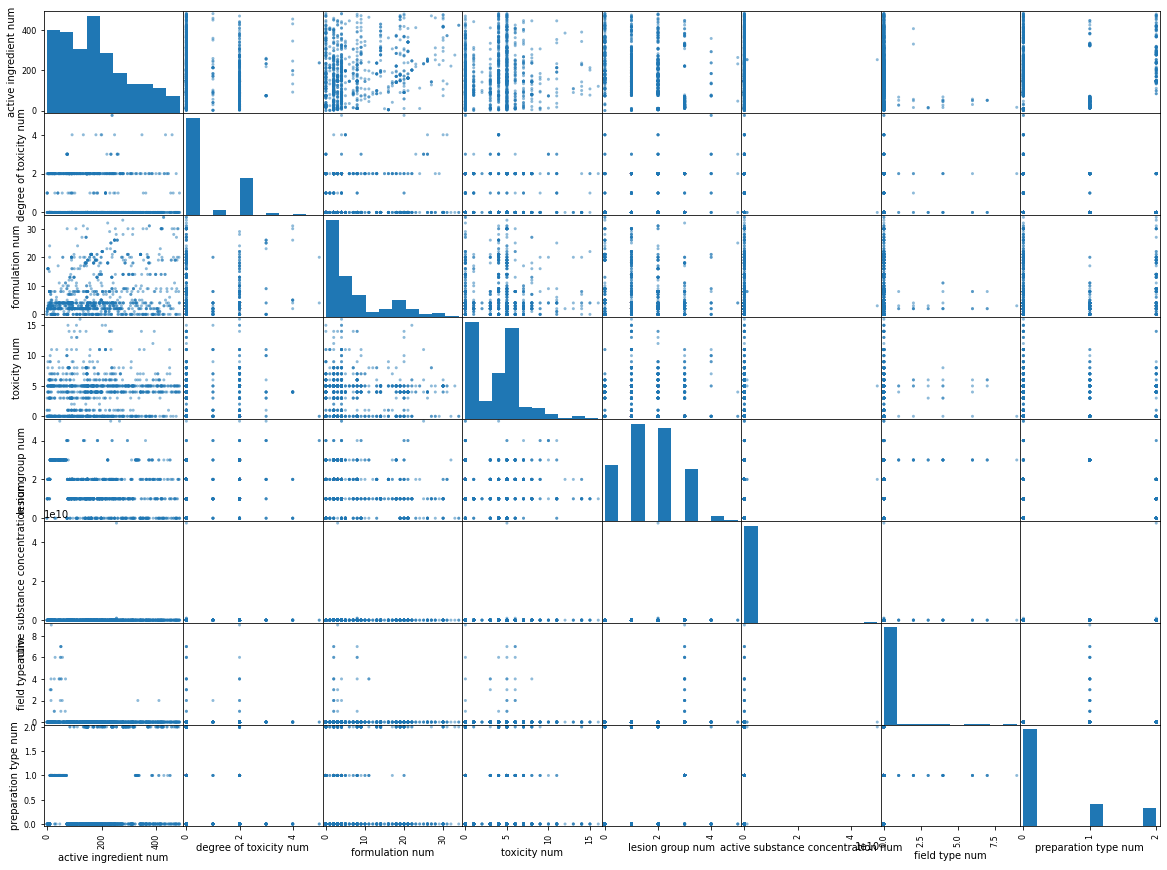

In [27]:
attributes = ['active ingredient num',
              'degree of toxicity num',
              'formulation num',
              'toxicity num',
              'lesion group num',
              'active substance concentration num',
              'field type num',
              'preparation type num']
scatter_matrix(clean_data[attributes], figsize=(20, 15))

In [28]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("kmeans", KMeans(n_clusters=25)),("rnd_for", RandomForestClassifier())])
pipeline.fit(X_train, y_train)
pipe_predict2 = pipeline.predict(X_train)
pipe_acc = accuracy_score(y_train , pipe_predict2)
pipe_acc

0.9751295336787564

In [29]:
pipeline.score(X_test, y_test)

0.756198347107438

In [30]:
knn2 = KNeighborsClassifier(n_neighbors=7)
dTree2 = DecisionTreeClassifier()
randomForest2 = RandomForestClassifier()

In [31]:
knn2.fit(X_train, y_train)
knn_predict2 = knn2.predict(X_train)
knn2_acc = accuracy_score(y_train , knn_predict2)
knn2_acc

0.8227979274611399

In [32]:
dTree2.fit(X_train, y_train)
dTree2_predict2 =dTree2.predict(X_train)
dTree2_acc = accuracy_score(y_train , dTree2_predict2)
dTree2_acc

0.9761658031088083

In [33]:
randomForest2.fit(X_train, y_train)
randomForest2.predict(X_train)
randomForest2_acc = accuracy_score(y_train , dTree2_predict2)
randomForest2_acc

0.9761658031088083

## Using ensemble learning methods

### AdaBoost

**n_estimators:** The **number** of base estimators or **weak learners** we want to use in our dataset. By default, the n_estimator is 50.

**learning_rate:** This parameter is provided to **shrink the contribution of each classifier**. By default, it is provided a value of 1.

**base_estimator:** This parameter is used to **signify** the type of base learners we can implement or the type of weak learner we want to use. It can Decision tree, Logistic Regressor, SVC anything. It cannot be Knn as the weight cannot be assigned in this model. By default, the base estimator is DecisionTreeClassifier(max_depth=1).

**algorithm:** It can be either SAMME or SAMME.R. The performance of the SAMME and SAMME.R algorithms are compared. SAMME.R uses the probability estimates to update the additive model, while SAMME uses the classifications only. As the example illustrates, the SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations. As we have seen, SAMME.R breaks after the error goes above 1/2. However this is not the case for SAMME although error can be bigger than 1/2 (or equal to 1/2), the weight of the estimator is still positive; hence, the misclassified training samples get more weights, and the test error keeps decreasing even after 600 iterations.

In [34]:
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train, y_train)
ada_clf.predict(X_train)
ada_clf.score(X_train, y_train)

0.827979274611399

In [35]:
ada1_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                                 algorithm="SAMME.R", learning_rate=0.5)
ada1_clf.fit(X_train, y_train)
ada1_clf.predict(X_train)
ada1_clf.score(X_train, y_train)

0.8632124352331606

### Bagging

In [36]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
                             n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
bag_clf.predict(X_train)
bag_clf.score(X_train, y_train)

0.8994818652849741

### Voting

#### Hard voting - majority voting based on equal or different weights

In [37]:
h_voting_clf = VotingClassifier(
    estimators=[('knn2', knn2), ('dTree2', dTree2),
                ('randomForest', randomForest2), ('pipeline', pipeline)], voting='hard')
h_voting_clf.fit(X_train, y_train)
h_voting_clf.predict(X_train)
h_voting_clf.score(X_train, y_train)

0.9761658031088083

#### Soft voting - classifies data based on the probabilities of all the predictions made by different classifiers

In [38]:
s_voting_clf = VotingClassifier(
    estimators=[('knn2', knn2), ('dTree2', dTree2),
                ('randomForest', randomForest2), ('pipeline', pipeline)], voting='soft')
s_voting_clf.fit(X_train, y_train)
s_voting_clf.predict(X_train)
s_voting_clf.score(X_train, y_train)

0.9761658031088083